In [70]:

import nilmtk

SyntaxError: invalid syntax (<ipython-input-70-9b9ee79ddb47>, line 1)

In [2]:
from nilmtk import DataSet

In [5]:

iawe = DataSet('C:/Users/Poojitha/Downloads/data/test_data1536128609.98_screen1.csv')

HDF5ExtError: HDF5 error back trace

  File "..\src\H5F.c", line 509, in H5Fopen
    unable to open file
  File "..\src\H5Fint.c", line 1652, in H5F_open
    unable to read superblock
  File "..\src\H5Fsuper.c", line 411, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file 'C:/Users/Poojitha/Downloads/data/test_data1536128609.98_screen1.csv'

In [20]:
import numpy as np
import pandas as pd

#filename = '/tmp/test.hdf5'
filename = 'C:/Users/Poojitha/PycharmProjects/Loadbal/PC1.hdf'
filename1 = 'C:/Users/Poojitha/PycharmProjects/Loadbal/PC2.hdf'
filename2 = 'C:/Users/Poojitha/PycharmProjects/Loadbal/Tempsensor.hdf'
filename2 = 'C:/Users/Poojitha/PycharmProjects/Loadbal/main.hdf'
data=pd.read_csv('C:/Users/Poojitha/Downloads/data/test_data1536128609.98_screen1.csv')
print(data)
df = pd.DataFrame(data=data)


# Save to HDF5
df.to_hdf(filename, 'data', mode='w', format='table')
del df    # allow df to be garbage collected



print(pd.read_hdf(filename, 'data'))


      Timestamp  MaximumCurrent  EffectiveCurrent  PC1  PC2  TempSensor
0    1536128611           36.62              25.9    1    0           0
1    1536128612           36.62              25.9    1    0           0
2    1536128613           36.62              25.9    1    0           0
3    1536128614           36.62              25.9    1    0           0
4    1536128615           36.62              25.9    1    0           0
..          ...             ...               ...  ...  ...         ...
198  1536128822            0.00               0.0    1    0           0
199  1536128823            0.00               0.0    1    0           0
200  1536128824            0.00               0.0    1    0           0
201  1536128825            0.00               0.0    1    0           0
202  1536128826            0.00               0.0    1    0           0

[203 rows x 6 columns]
      Timestamp  MaximumCurrent  EffectiveCurrent  PC1  PC2  TempSensor
0    1536128611           36.62         

In [21]:
print(pd.read_hdf(filename, 'data'))

      Timestamp  MaximumCurrent  EffectiveCurrent  PC1  PC2  TempSensor
0    1536128611           36.62              25.9    1    0           0
1    1536128612           36.62              25.9    1    0           0
2    1536128613           36.62              25.9    1    0           0
3    1536128614           36.62              25.9    1    0           0
4    1536128615           36.62              25.9    1    0           0
..          ...             ...               ...  ...  ...         ...
198  1536128822            0.00               0.0    1    0           0
199  1536128823            0.00               0.0    1    0           0
200  1536128824            0.00               0.0    1    0           0
201  1536128825            0.00               0.0    1    0           0
202  1536128826            0.00               0.0    1    0           0

[203 rows x 6 columns]


In [23]:
import pandas as pd
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import cPickle as pk
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans

%matplotlib inline
def fit_Kmeans(X_train,X_test, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters).fit(X_train)
    centroids = kmeans.cluster_centers_ 
    pred_train = kmeans.predict(X_train)
    pred_test = kmeans.predict(X_test)
    SSE_train = np.sum([(X_train[idx] - centroids[pred_train[idx]])**2 for idx in xrange(len(X_train))])
    SSE_test = np.sum([(X_test[idx] - centroids[pred_test[idx]])**2 for idx in xrange(len(X_test))])
    
    return kmeans, SSE_train, SSE_test


cluster_list = xrange(1,8)
train_error = []
test_error = []

for c in cluster_list:
    _, SSE_train, SSE_test = fit_Kmeans(X_train,X_test, c)
    train_error.append(SSE_train)
    test_error.append(SSE_test)

plt.plot(cluster_list, train_error)
plt.plot(cluster_list, test_error)
plt.show()

ModuleNotFoundError: No module named 'cPickle'

In [24]:
%matplotlib inline


In [28]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

redd = DataSet('C:/Users/Poojitha/PycharmProjects/Loadbal/test.hdf')
elec = redd.buildings[1].elec
elec

AttributeError: Attribute 'metadata' does not exist in node: '/'

In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm,tree, ensemble,model_selection

In [33]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [38]:
train_pc1 = pd.read_csv("C:/Users/Poojitha/Downloads/data/test_data1536128609.98_screen1.csv", header=None)
print(train_pc1.shape)
train_pc1.head()

(204, 3)


,0,1,2
0,0,1.00,2.0
1,1536128611,36.62,25.9
2,1536128612,36.62,25.9
3,1536128613,36.62,25.9
4,1536128614,36.62,25.9


In [40]:
train_pc2 = pd.read_csv("C:/Users/Poojitha/Downloads/data/test_data1536128871.84_screen2.csv", header=None)
print(train_pc2.shape)
train_pc2.head()

(292, 3)


,0,1,2
0,0,1.00,2.0
1,1536128873,36.62,25.9
2,1536128874,24.41,17.3
3,1536128875,24.41,17.3
4,1536128876,24.41,17.3


In [42]:
train_tempsen=pd.read_csv("C:/Users/Poojitha/Downloads/data/test_data1536129261.77_device253.csv",header=None)
print(train_tempsen.shape)
train_tempsen.head()

(270, 3)


,0,1,2
0,0,1.0,2.0
1,1536129262,0.0,0.0
2,1536129263,0.0,0.0
3,1536129264,0.0,0.0
4,1536129265,0.0,0.0


In [43]:
testdata=pd.read_csv("C:/Users/Poojitha/Downloads/data/test_data1536129670.55_main.csv",header=None)
print(testdata.shape)
testdata.head()

(2974, 3)


,0,1,2
0,0,1.00,2.0
1,1536129671,24.41,17.3
2,1536129672,12.21,8.6
3,1536129673,36.62,25.9
4,1536129674,24.41,17.3


In [44]:
train_pc1.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
train_pc2.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
train_tempsen.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)
testdata.rename(columns={0:"Timestamp",1:"MaxCurrent",2:"EffCurrent"},inplace=True)

In [45]:
train_pc1.head()

,Timestamp,MaxCurrent,EffCurrent
0,0,1.00,2.0
1,1536128611,36.62,25.9
2,1536128612,36.62,25.9
3,1536128613,36.62,25.9
4,1536128614,36.62,25.9


In [46]:
train_pc1.isnull().sum()

Timestamp     0
MaxCurrent    0
EffCurrent    0
dtype: int64

In [47]:
train_pc2.isnull().sum()

Timestamp     0
MaxCurrent    0
EffCurrent    0
dtype: int64

In [48]:
train_tempsen.isnull().sum()

Timestamp     0
MaxCurrent    0
EffCurrent    0
dtype: int64

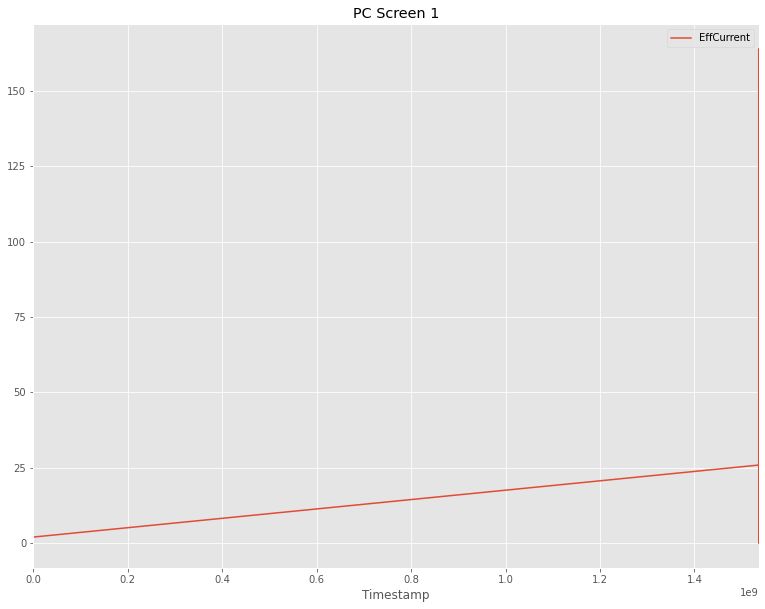

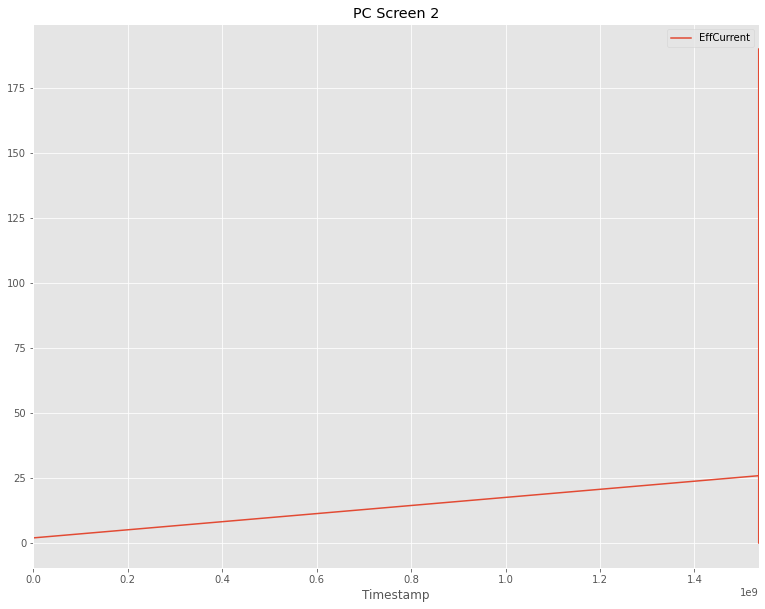

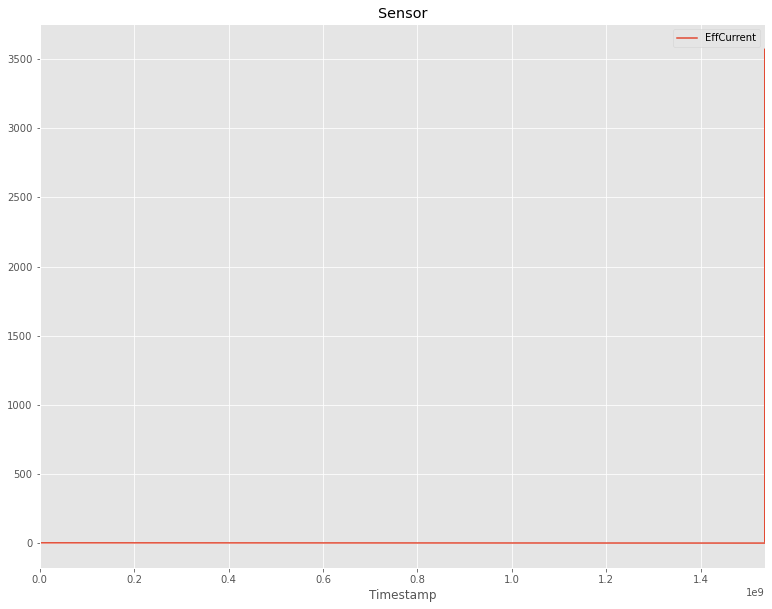

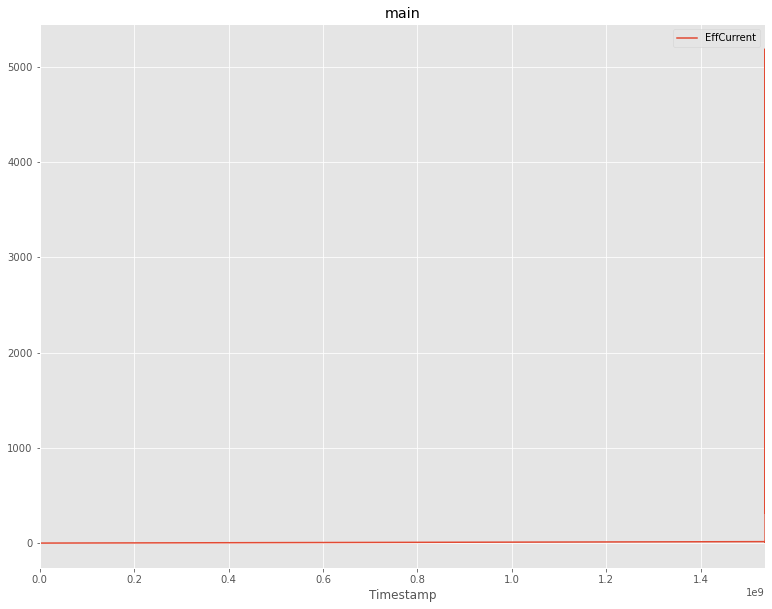

In [49]:
linesPC1 = train_pc1.plot.line(x='Timestamp', y='EffCurrent',title='PC Screen 1')  
linesPC2 = train_pc2.plot.line(x='Timestamp', y='EffCurrent',title='PC Screen 2')
linestempsen = train_tempsen.plot.line(x='Timestamp', y='EffCurrent',title='Sensor')
linemain = testdata.plot.line(x='Timestamp', y='EffCurrent',title='main')

In [50]:
for index,row in train_pc1.iterrows():
    if(index==0):
        train_pc1['Time Period'][0]=0
    else:
        train_pc1['Time Period'][index]=train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1]
train_pc1.head()

KeyError: 'Time Period'

In [51]:
train_pc1['Time Period']=''

for index,row in train_pc1.iterrows():
    if(index==0):
        train_pc1['Time Period'][0]=0
    else:
        train_pc1['Time Period'][index]=train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1]
train_pc1.head()

<ipython-input-51-1c9c9efa0a80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc1['Time Period'][0]=0
<ipython-input-51-1c9c9efa0a80>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc1['Time Period'][index]=train_pc1['Timestamp'][index]-train_pc1['Timestamp'][index-1]


,Timestamp,MaxCurrent,EffCurrent,Time Period
0,0,1.00,2.0,0
1,1536128611,36.62,25.9,1536128611
2,1536128612,36.62,25.9,1
3,1536128613,36.62,25.9,1
4,1536128614,36.62,25.9,1


In [52]:
train_pc1['PC Screen1']=''
train_pc1['EffCurrent_Diff'] = train_pc1['EffCurrent'].diff()
for index,row in train_pc1.iterrows():
    if (train_pc1['EffCurrent'][index] == 0):
        train_pc1['PC Screen1'][index] = 0 
    else:
        if (train_pc1['EffCurrent_Diff'][index]== 0):
            train_pc1['PC Screen1'][index] = 2
        else:
            train_pc1['PC Screen1'][index] = 1
train_pc1.head()

<ipython-input-52-cbc4c672ae72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc1['PC Screen1'][index] = 1
<ipython-input-52-cbc4c672ae72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc1['PC Screen1'][index] = 2
<ipython-input-52-cbc4c672ae72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc1['PC Screen1'][index] = 0


,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,EffCurrent_Diff
0,0,1.00,2.0,0,1,NaN
1,1536128611,36.62,25.9,1536128611,1,23.9
2,1536128612,36.62,25.9,1,2,0.0
3,1536128613,36.62,25.9,1,2,0.0
4,1536128614,36.62,25.9,1,2,0.0


In [53]:
train_pc1.drop('EffCurrent_Diff',axis=1,inplace=True)
train_pc1.head()

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1
0,0,1.00,2.0,0,1
1,1536128611,36.62,25.9,1536128611,1
2,1536128612,36.62,25.9,1,2
3,1536128613,36.62,25.9,1,2
4,1536128614,36.62,25.9,1,2


In [54]:
train_pc2['Time Period']=''

for index,row in train_pc2.iterrows():
    if(index==0):
        train_pc2['Time Period'][0]=0
    else:
        train_pc2['Time Period'][index]=train_pc2['Timestamp'][index]-train_pc2['Timestamp'][index-1]
        
train_pc2['PC Screen2']=''
train_pc2['EffCurrent_Diff'] = train_pc2['EffCurrent'].diff()
for index,row in train_pc2.iterrows():
    if (train_pc2['EffCurrent'][index] == 0):
        train_pc2['PC Screen2'][index] = 0 
    else:
        if (train_pc2['EffCurrent_Diff'][index]== 0):
            train_pc2['PC Screen2'][index] = 2
        else:
            train_pc2['PC Screen2'][index] = 1
train_pc2.drop('EffCurrent_Diff',axis=1,inplace=True)
train_pc2.head()

<ipython-input-54-18f5d5c55754>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc2['Time Period'][0]=0
<ipython-input-54-18f5d5c55754>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc2['Time Period'][index]=train_pc2['Timestamp'][index]-train_pc2['Timestamp'][index-1]
<ipython-input-54-18f5d5c55754>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pc2['PC Screen2'][index] = 1
<ipython-input-54-18f5d5c55754>:16: Set

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen2
0,0,1.00,2.0,0,1
1,1536128873,36.62,25.9,1536128873,1
2,1536128874,24.41,17.3,1,1
3,1536128875,24.41,17.3,1,2
4,1536128876,24.41,17.3,1,2


In [55]:
train_tempsen['Time Period']=''
for index,row in train_tempsen.iterrows():
    if(index==0):
        train_tempsen['Time Period'][0]=0
    else:
        train_tempsen['Time Period'][index]=train_tempsen['Timestamp'][index]-train_tempsen['Timestamp'][index-1]
train_tempsen['Temp sensor']=''
for index,row in train_tempsen.iterrows():
    if (train_tempsen['EffCurrent'][index] != 0):
        train_tempsen['Temp sensor'][index] = 1 
    else:
        train_tempsen['Temp sensor'][index] = 0
train_tempsen.head()

<ipython-input-55-43bac1a34128>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Time Period'][0]=0
<ipython-input-55-43bac1a34128>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Time Period'][index]=train_tempsen['Timestamp'][index]-train_tempsen['Timestamp'][index-1]
<ipython-input-55-43bac1a34128>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Temp sensor'][index] = 1
<ipython-input-55-

,Timestamp,MaxCurrent,EffCurrent,Time Period,Temp sensor
0,0,1.0,2.0,0,1
1,1536129262,0.0,0.0,1536129262,0
2,1536129263,0.0,0.0,1,0
3,1536129264,0.0,0.0,1,0
4,1536129265,0.0,0.0,1,0


In [56]:
train_tempsen['Time Period']=''
for index,row in train_tempsen.iterrows():
    if(index==0):
        train_tempsen['Time Period'][0]=0
    else:
        train_tempsen['Time Period'][index]=train_tempsen['Timestamp'][index]-train_tempsen['Timestamp'][index-1]
train_tempsen['Temp sensor']=''
for index,row in train_tempsen.iterrows():
    if (train_tempsen['EffCurrent'][index] != 0):
        train_tempsen['Temp sensor'][index] = 1 
    else:
        train_tempsen['Temp sensor'][index] = 0
train_tempsen.head()

<ipython-input-56-43bac1a34128>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Time Period'][0]=0
<ipython-input-56-43bac1a34128>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Time Period'][index]=train_tempsen['Timestamp'][index]-train_tempsen['Timestamp'][index-1]
<ipython-input-56-43bac1a34128>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tempsen['Temp sensor'][index] = 1
<ipython-input-56-

,Timestamp,MaxCurrent,EffCurrent,Time Period,Temp sensor
0,0,1.0,2.0,0,1
1,1536129262,0.0,0.0,1536129262,0
2,1536129263,0.0,0.0,1,0
3,1536129264,0.0,0.0,1,0
4,1536129265,0.0,0.0,1,0


In [57]:
models={'logit':'','svm':'','rforest':''}
X = pd.DataFrame(train_pc1[['MaxCurrent','EffCurrent','Time Period']])
y = pd.DataFrame(train_pc1['PC Screen1'])
y = y.astype('int')
# Split the Dataset into Train and Test RANDOMLY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
##Logistic Regression
regularization=[0.001,0.01,0.1,1,10,100,1000]
print("Logistic Regression")
scores=[]
for c in regularization:
    logit1=linear_model.LogisticRegression(C=c)
    logit1.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", logit1.score(X_test,y_test))
    scores.append(logit1.score(X_test, y_test))

c=regularization[np.argmax(scores)]
logit1=linear_model.LogisticRegression(C=c)
logit1.fit(X_train,y_train)
print("With C= ",c," Score is:",logit1.score(X_test, y_test))

models['logit']=logit1.score(X_test, y_test)
y_pred=logit1.predict(X_test)
    
labels = [0,1,2]
print("Accuracy= ",round(logit1.score(X_test,y_test)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc1= svm.LinearSVC(C=c)
    svc1.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", svc1.score(X_test,y_test))
    scores.append(svc1.score(X_test,y_test))

c=regularization[np.argmax(scores)]
svc1=svm.LinearSVC(C=c)
svc1.fit(X_train,y_train)
y_pred_svm=svc1.predict(X_test)

print("Accuracy= ",round(svc1.score(X_test,y_test)*100,1),"%")
    
models['svm']=svc1.score(X_test, y_test)

#Boosting with Random Forest
print("Boosting")
rforest1 = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest1.fit(X_train, y_train)

print("Accuracy: ",rforest1.score(X_test,y_test))
models['rforest']=rforest1.score(X_test, y_test)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for C=  0.001  is=  0.7647058823529411
Accuracy for C=  0.01  is=  0.7647058823529411
Accuracy for C=  0.1  is=  0.7647058823529411
Accuracy for C=  1  is=  0.7647058823529411
Accuracy for C=  10  is=  0.7647058823529411
Accuracy for C=  100  is=  0.7647058823529411
Accuracy for C=  1000  is=  0.7647058823529411
With C= 

C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

 0.001  Score is: 0.7647058823529411
Accuracy=  76.5 %
Support Vector Machines
Accuracy for C=  0.001  is=  0.7647058823529411
Accuracy for C=  0.01  is=  0.7843137254901961
Accuracy for C=  0.1  is=  0.7647058823529411
Accuracy for C=  1  is=  0.7647058823529411
Accuracy for C=  10  is=  0.7647058823529411
Accuracy for C=  100  is=  0.6862745098039216
Accuracy for C=  1000  is=  0.7647058823529411
Accuracy=  74.5 %
Boosting


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to con

Accuracy:  0.9019607843137255
Best Model is :  rforest


In [58]:
models={'logit':'','svm':'','rforest':''}
X = pd.DataFrame(train_pc2[['MaxCurrent','EffCurrent','Time Period']])
y = pd.DataFrame(train_pc2['PC Screen2'])
y = y.astype('int')
# Split the Dataset into Train and Test RANDOMLY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
##Logistic Regression
regularization=[0.001,0.01,0.1,1,10,100,1000]
print("Logistic Regression")
scores=[]
for c in regularization:
    logit2=linear_model.LogisticRegression(C=c)
    logit2.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", logit2.score(X_test,y_test))
    scores.append(logit2.score(X_test, y_test))

c=regularization[np.argmax(scores)]
logit2=linear_model.LogisticRegression(C=c)
logit2.fit(X_train,y_train)
print("With C= ",c," Score is:",logit2.score(X_test, y_test))

models['logit']=logit2.score(X_test, y_test)
y_pred=logit2.predict(X_test)
    
labels = [0,1,2]
print("Accuracy= ",round(logit2.score(X_test,y_test)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc2= svm.LinearSVC(C=c)
    svc2.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", svc2.score(X_test,y_test))
    scores.append(svc2.score(X_test,y_test))

c=regularization[np.argmax(scores)]
svc2=svm.LinearSVC(C=c)
svc2.fit(X_train,y_train)
y_pred_svm=svc2.predict(X_test)

print("Accuracy= ",round(svc2.score(X_test,y_test)*100,1),"%")
    
models['svm']=svc2.score(X_test, y_test)

#Boosting with Random Forest
print("Boosting")
rforest2 = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest2.fit(X_train, y_train)

print("Accuracy: ",rforest2.score(X_test,y_test))
models['rforest']=rforest2.score(X_test, y_test)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression
Accuracy for C=  0.001  is=  0.6027397260273972
Accuracy for C=  0.01  is=  0.2876712328767123
Accuracy for C=  0.1  is=  0.2876712328767123
Accuracy for C=  1  is=  0.2876712328767123
Accuracy for C=  10  is=  0.2876712328767123
Accuracy for C=  100  is=  0.2876712328767123
Accuracy for C=  1000  is=  0.2876712328767123


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

With C=  0.001  Score is: 0.6027397260273972
Accuracy=  60.3 %
Support Vector Machines
Accuracy for C=  0.001  is=  0.7123287671232876
Accuracy for C=  0.01  is=  0.7123287671232876
Accuracy for C=  0.1  is=  0.5753424657534246
Accuracy for C=  1  is=  0.7123287671232876
Accuracy for C=  10  is=  0.7123287671232876
Accuracy for C=  100  is=  0.3287671232876712
Accuracy for C=  1000  is=  0.7123287671232876


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-58-d3b86cb26757>:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest2.fit(X_train, y_train)


Accuracy=  71.2 %
Boosting
Accuracy:  0.7397260273972602
Best Model is :  rforest


In [59]:
models={'logit':'','svm':'','rforest':''}
X = pd.DataFrame(train_tempsen[['MaxCurrent','EffCurrent','Time Period']])
y = pd.DataFrame(train_tempsen['Temp sensor'])
y = y.astype('int')
# Split the Dataset into Train and Test RANDOMLY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
##Logistic Regression
regularization=[0.001,0.01,0.1,1,10,100,1000]
print("Logistic Regression")
scores=[]
for c in regularization:
    logit=linear_model.LogisticRegression(C=c)
    logit.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", logit.score(X_test,y_test))
    scores.append(logit.score(X_test, y_test))

c=regularization[np.argmax(scores)]
logit=linear_model.LogisticRegression(C=c)
logit.fit(X_train,y_train)
print("With C= ",c," Score is:",logit.score(X_test, y_test))

models['logit']=logit.score(X_test, y_test)
y_pred=logit.predict(X_test)
    
labels = [0,1,2]
print("Accuracy= ",round(logit.score(X_test,y_test)*100,1),"%")

##Support Vector Machines
print("Support Vector Machines")
scores=[]
for c in regularization:
    svc= svm.LinearSVC(C=c)
    svc.fit(X_train,y_train)
    print("Accuracy for C= ",c," is= ", svc.score(X_test,y_test))
    scores.append(svc.score(X_test,y_test))

c=regularization[np.argmax(scores)]
svc=svm.LinearSVC(C=c)
svc.fit(X_train,y_train)
y_pred_svm=svc.predict(X_test)

print("Accuracy= ",round(svc.score(X_test,y_test)*100,1),"%")
    
models['svm']=svc.score(X_test, y_test)

#Boosting with Random Forest
print("Boosting")
rforest = ensemble.RandomForestClassifier(max_features = 3, oob_score = True, random_state = 2018)
rforest.fit(X_train, y_train)

print("Accuracy: ",rforest.score(X_test,y_test))
models['rforest']=rforest.score(X_test, y_test)

##Running the model on the test Data

model=max(models,key=models.get)
print("Best Model is : ",model)

Logistic Regression


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for C=  0.001  is=  1.0
Accuracy for C=  0.01  is=  1.0
Accuracy for C=  0.1  is=  1.0
Accuracy for C=  1  is=  1.0
Accuracy for C=  10  is=  1.0
Accuracy for C=  100  is=  

C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

1.0
Accuracy for C=  1000  is=  1.0
With C=  0.001  Score is: 1.0
Accuracy=  100.0 %
Support Vector Machines
Accuracy for C=  0.001  is=  1.0
Accuracy for C=  0.01  is=  1.0
Accuracy for C=  0.1  is=  1.0
Accuracy for C=  1  is=  1.0
Accuracy for C=  10  is=  1.0
Accuracy for C=  100  is=  1.0
Accuracy for C=  1000  is=  1.0
Accuracy=  100.0 %
Boosting


C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Poojitha\.conda\envs\nilmtk-env\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

Accuracy:  1.0
Best Model is :  logit


In [60]:
testdata['Time Period']=''
for index,row in testdata.iterrows():
    if(index==0):
        testdata['Time Period'][0]=0
    else:
        testdata['Time Period'][index]=testdata['Timestamp'][index]-testdata['Timestamp'][index-1]
testdata.head()

<ipython-input-60-b8225ea4269a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['Time Period'][0]=0
<ipython-input-60-b8225ea4269a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['Time Period'][index]=testdata['Timestamp'][index]-testdata['Timestamp'][index-1]


,Timestamp,MaxCurrent,EffCurrent,Time Period
0,0,1.00,2.0,0
1,1536129671,24.41,17.3,1536129671
2,1536129672,12.21,8.6,1
3,1536129673,36.62,25.9,1
4,1536129674,24.41,17.3,1


In [61]:
testdata

,Timestamp,MaxCurrent,EffCurrent,Time Period
0,0,1.00,2.0,0
1,1536129671,24.41,17.3,1536129671
2,1536129672,12.21,8.6,1
3,1536129673,36.62,25.9,1
4,1536129674,24.41,17.3,1
...,...,...,...,...
2969,1536132842,463.87,328.1,1
2970,1536132843,451.66,319.4,1
2971,1536132844,451.66,319.4,1
2972,1536132845,451.66,319.4,1


In [62]:
y_pc1_pred=rforest1.predict(pd.DataFrame(testdata.iloc[:,1:4]))
y_pc2_pred=logit2.predict(pd.DataFrame(testdata.iloc[:,1:4]))
y_sensor_pred=logit.predict(pd.DataFrame(testdata.iloc[:,1:4]))
y_pc1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
frame=pd.DataFrame(list(zip(y_pc1_pred,y_pc2_pred,y_sensor_pred)))
frame.rename(columns={0:'PC Screen1',1:'PC Screen2',2:'Temperature Sensor'},inplace=True)
testdata=pd.concat([testdata,frame],axis=1,sort=False)
testdata

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,PC Screen2,Temperature Sensor
0,0,1.00,2.0,0,1,2,0
1,1536129671,24.41,17.3,1536129671,1,1,0
2,1536129672,12.21,8.6,1,1,2,1
3,1536129673,36.62,25.9,1,2,2,1
4,1536129674,24.41,17.3,1,1,2,1
...,...,...,...,...,...,...,...
2969,1536132842,463.87,328.1,1,1,2,1
2970,1536132843,451.66,319.4,1,1,2,1
2971,1536132844,451.66,319.4,1,1,2,1
2972,1536132845,451.66,319.4,1,1,2,1


In [64]:
testdata.replace(0,'OFF',inplace=True)
testdata.replace(1,'ON',inplace=True)
testdata.replace(2,'IDLE',inplace=True)
testdata.head()

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,PC Screen2,Temperature Sensor
0,OFF,ON,IDLE,OFF,ON,IDLE,OFF
1,1536129671,24.41,17.3,1536129671,ON,ON,OFF
2,1536129672,12.21,8.6,ON,ON,IDLE,ON
3,1536129673,36.62,25.9,ON,IDLE,IDLE,ON
4,1536129674,24.41,17.3,ON,ON,IDLE,ON


In [65]:
testdata

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,PC Screen2,Temperature Sensor
0,OFF,ON,IDLE,OFF,ON,IDLE,OFF
1,1536129671,24.41,17.3,1536129671,ON,ON,OFF
2,1536129672,12.21,8.6,ON,ON,IDLE,ON
3,1536129673,36.62,25.9,ON,IDLE,IDLE,ON
4,1536129674,24.41,17.3,ON,ON,IDLE,ON
...,...,...,...,...,...,...,...
2969,1536132842,463.87,328.1,ON,ON,IDLE,ON
2970,1536132843,451.66,319.4,ON,ON,IDLE,ON
2971,1536132844,451.66,319.4,ON,ON,IDLE,ON
2972,1536132845,451.66,319.4,ON,ON,IDLE,ON


In [66]:
testdata.groupby('PC Screen1').size()

PC Screen1
IDLE       3
ON      2971
dtype: int64

In [67]:
testdata.groupby('PC Screen2').size()

PC Screen2
IDLE    2973
ON         1
dtype: int64

In [68]:
testdata.groupby('Temperature Sensor').size()

Temperature Sensor
OFF       2
ON     2972
dtype: int64

In [69]:
testdata

,Timestamp,MaxCurrent,EffCurrent,Time Period,PC Screen1,PC Screen2,Temperature Sensor
0,OFF,ON,IDLE,OFF,ON,IDLE,OFF
1,1536129671,24.41,17.3,1536129671,ON,ON,OFF
2,1536129672,12.21,8.6,ON,ON,IDLE,ON
3,1536129673,36.62,25.9,ON,IDLE,IDLE,ON
4,1536129674,24.41,17.3,ON,ON,IDLE,ON
...,...,...,...,...,...,...,...
2969,1536132842,463.87,328.1,ON,ON,IDLE,ON
2970,1536132843,451.66,319.4,ON,ON,IDLE,ON
2971,1536132844,451.66,319.4,ON,ON,IDLE,ON
2972,1536132845,451.66,319.4,ON,ON,IDLE,ON
